In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr
from matplotlib.colors import Normalize

In [69]:
def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

In [70]:
MI = pd.read_csv('/Users/merieldoyle/Desktop/ckMI/data/MI_cleaned.csv', index_col = [0])
MI_cond = MI.drop(MI.iloc[:, 90:125], axis = 1)
MI_cond = MI_cond.drop(MI_cond.iloc[:, 92:118], axis = 1)
MI_cond = MI_cond.drop(['ETHNI6'], axis = 1)

In [71]:
categories = ['ped', 'drugs', 'psycho', 'gay', 'fetish', 'racist', 'trans', 'obese', 'dep', 'schizo']
politics = MI_cond.iloc[:, 90]
dfs = {}

for idx, category in enumerate(categories):
    start = idx * 9
    end = start + 9
    dfs[category] = MI_cond.iloc[:, start:end].copy()
    dfs[category]['politics'] = politics

In [120]:
def plot_cor_matrix(MI_cond, str):
    corr = MI_cond.corr() # correlation matrix
    pval = MI_cond.corr(method = pearsonr_pval) # corresponding pval
    pval[pval == 1] = np.nan # change 1's to NaN
    fig, ax = plt.subplots(figsize = (6, 4.285))
    plt.text(5, 3, str, fontsize = 15) # title
    mask = np.invert(np.tril(pval > 0.05)) # mask opposite of insig pval
    cmap = sns.diverging_palette(0, 0, n = 1, l = 100, as_cmap = False) # generate colormap
    sns.heatmap(corr,
                mask = mask,
                cmap = cmap,
                annot = True, 
                annot_kws = {"size": 5.7}, # size of insig pval
                square = True,
                cbar = False)
    
    mask = np.invert(np.tril(pval < 0.05)) # mask opposite of sig pval
    cmap = sns.diverging_palette(20, 230, as_cmap = True)
    xticklabels = ['Mental Illness', 'Difficulty Changing', 'Desired Change', 'Genetics', 'Punishment', 
                   'Control', 'Wrongness', 'Internal Distress', 'Common', 'Conservatism']
    
    yticklabels = xticklabels
    sns.heatmap(corr, 
                mask = mask,
                cmap = cmap,
                vmin = -1,
                vmax = 1,
                annot = True,
                annot_kws = {"size": 7.5, "weight": "bold"}, # size of sig pval
                xticklabels = xticklabels,
                yticklabels = yticklabels,
                center = 0,
                square = True,
                cbar = False)
    
    ax.tick_params(labelsize = 10) # tick size
    plt.xticks(rotation = 40, ha = 'right') # rotate xticks
    for tick in ax.xaxis.get_major_ticks():
            tick.label.set_fontsize(7.8)
    for tick in ax.yaxis.get_major_ticks():
            tick.label.set_fontsize(7.8)

    cmap = sns.diverging_palette(20, 230, as_cmap = True)
    norm = Normalize(vmin = -1, vmax = 1)
    sm = plt.cm.ScalarMappable(cmap = cmap, norm = norm)
    cax = fig.add_axes([0.77, 0.1, 0.025, 0.7]) # [horiz axis, vert axis, width, height]
    cbar = plt.colorbar(sm, 
                        shrink = 0.8, 
                        aspect = 30, 
                        pad = 0,
                        cax = cax)
    
    cbar.ax.tick_params(size = 0, 
                        labelsize = 7)
    
    cbar.outline.set_visible(False)
    
    # plt.savefig('correlation matrices/' + str + '.png', dpi = 300, bbox_inches = 'tight')
    
    plt.show()

/var/folders/q7/0p1jf63j7lx6ldgn2kdfqlz00000gn/T/ipykernel_11106/3228973684.py:36: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(7.8)
/var/folders/q7/0p1jf63j7lx6ldgn2kdfqlz00000gn/T/ipykernel_11106/3228973684.py:38: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(7.8)


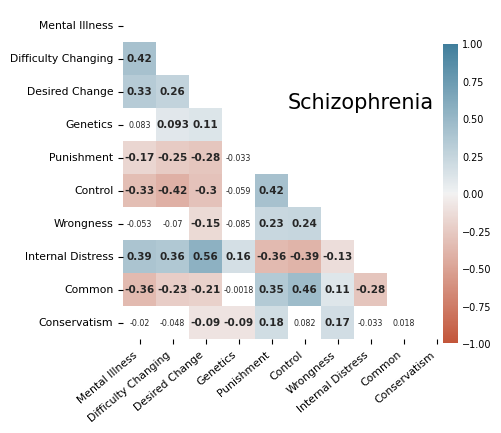

In [121]:
# plot_cor_matrix(dfs['ped'], 'Pedophilia')
# plot_cor_matrix(dfs['drugs'], "Drugs")
# plot_cor_matrix(dfs['psycho'], "Psychopath")
# plot_cor_matrix(dfs['gay'], "Gay") 
# plot_cor_matrix(dfs['fetish'], "Fetish") 
# plot_cor_matrix(dfs['racist'], "Racist")
# plot_cor_matrix(dfs['trans'], "Transgender")
# plot_cor_matrix(dfs['obese'], "Obese")
# plot_cor_matrix(dfs['dep'], "Depression")
plot_cor_matrix(dfs['schizo'], "Schizophrenia")

### ALL CONDITIONS

In [122]:
categories = ['mental', 'change', 'want change', 'genes', 'punish', 'control', 'wrong', 'distress', 'common']

empties = {}

for idx, category in enumerate(categories):
    empty_df = pd.DataFrame()
    for i in np.arange(0, 10): 
        column_data = MI_cond.iloc[:, 9*i + idx].reset_index(drop=True)
        empty_df = pd.concat([empty_df, column_data], axis = 0)
    empties[category] = empty_df

MI_politics = MI_cond.iloc[:, 90].reset_index(drop=True)
empties['politics'] = MI_politics

In [123]:
MI_perc = pd.concat(empties.values(), axis=1)
MI_perc.columns = ['Mental Illness', 'Difficulty Changing', 'Desired Change', 'Genetics', 'Punishment', 'Control', 'Wrongness', 'Internal Distress', 'Common', 'Conservatism']
MI_perc

,Mental Illness,Difficulty Changing,Desired Change,Genetics,Punishment,Control,Wrongness,Internal Distress,Common,Conservatism
0,3.0,4.0,3.0,5.0,5.0,4.0,4.0,4.0,8.0,3
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...
1217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
1218,4.0,6.0,6.0,6.0,5.0,5.0,6.0,4.0,77.0,1
1219,7.0,7.0,5.0,4.0,4.0,1.0,1.0,5.0,40.0,7
1220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [124]:
per_corr = MI_perc.corr()
per_pval = MI_perc.corr(method = pearsonr_pval)

In [142]:
def plot_cor_matrix(perc, str):
    corr = perc.corr()  # correlation matrix
    pval = perc.corr(method=pearsonr_pval)  # corresponding pval
    pval[pval == 1] = np.nan  # change 1's to NaN
    
    fig, ax = plt.subplots(figsize=(6, 4.285))
    plt.title(str, loc="center")
    
    # Significant values heatmap (bold annotations)
    # mask non-significant values and correlation values of 1
    mask_sig = (pval >= 0.05) | (corr == 1)
    cmap = sns.diverging_palette(20, 230, as_cmap=True)
    sns.heatmap(corr,
                mask=mask_sig,
                cmap=cmap,
                vmin=-1,
                vmax=1,
                annot=True,
                annot_kws={"size": 6.5, "weight": "bold"},
                square=True,
                cbar=False)
    
    # Non-significant values heatmap (normal annotations)
    mask_non_sig = (pval < 0.05) | (corr == 1)
    sns.heatmap(corr,
                mask=mask_non_sig,
                cmap=cmap,
                vmin=-1,
                vmax=1,
                annot=True,
                annot_kws={"size": 5.5},
                square=True,
                cbar=False)
    
    ax.tick_params(labelsize=10)
    plt.xticks(rotation=40, ha='right')

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(7.8)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(7.8)
    
    norm = Normalize(vmin=-1, vmax=1)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    
    cax = fig.add_axes([0.83, 0.1, 0.025, 0.7])
    cbar = plt.colorbar(sm, shrink=0.8, aspect=30, pad=0, cax=cax)
    cbar.ax.tick_params(size=0, labelsize=7)
    cbar.outline.set_visible(False)
    
    plt.savefig('correlation matrices/' + 'All Conditions' + '.png', dpi = 300, bbox_inches = 'tight')
    
    plt.show()

/var/folders/q7/0p1jf63j7lx6ldgn2kdfqlz00000gn/T/ipykernel_11106/2785135850.py:39: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(7.8)
/var/folders/q7/0p1jf63j7lx6ldgn2kdfqlz00000gn/T/ipykernel_11106/2785135850.py:41: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(7.8)


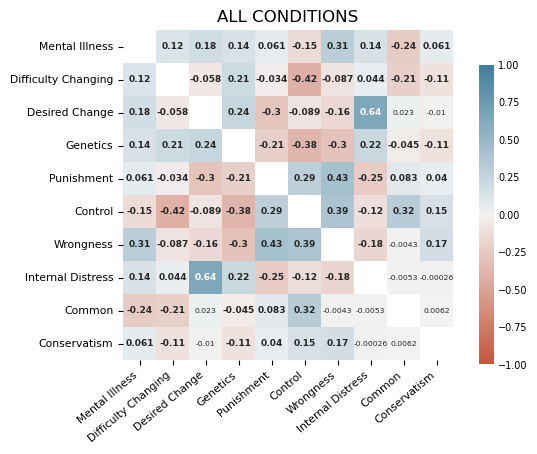

In [143]:
plot_cor_matrix(MI_perc, "ALL CONDITIONS")